 # <u> Thera Bank Personal Loan Campaign </u>

# Case Stydy Context
This case is in the Banking Domain. 
In particular,Thera Bank is a bank whose majority are liability customers (depositors) with varying size of deposits so the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors. 
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Step1. 
Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [2]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the dataset
#Import the dataset Bank_Personal_Loan_Modelling.csv name it "Bank_Data" and print the head to check it.
Bank_Data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")  
Bank_Data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#in order to check the datatype we use the .dtypes function
Bank_Data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
# In order to do the Statitical summary of the data columns we will use the "describe" and "transpose" functions
Bank_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
# "shape" fuction, in order to define the shape of the dataset
print('The shape of the data set is:',Bank_Data.shape)

The shape of the data set is: (5000, 14)


In [7]:
# Check the data set for null values :
print('Null Values in the Dataset:  ',Bank_Data.isnull().values.any()) # checking if there are any null values in data set, 
Bank_Data.isna().sum() # Gives the sum of null per attribute.

Null Values in the Dataset:   False


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Note: There are 13 independent variables and 1 dependent variable ‘Personal Loan’ in the data set with No Null values. The dataset consist of 5000 rows which will be splitted later into test & train datasets.

# Exploratory Data Analysis

In this section, we will explore the data set further in the form of data visualizations. This will help provide initial insights on the distribution of the numeric variables as well as important features impacting the response variable.
we will also define the data distribution in each attribute and target variable and more specifically the following:

Number of unique in each column

Number of people with zero mortgage

Number of people with zero credit card spending per month

Value counts of all categorical columns

Univariate and Bivariate

Get data model ready


In [8]:
#Number of unique in each column
uniqueValues = Bank_Data.nunique()
 
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [9]:
#Number of Unique in each column + Sample
BDFigures = []
for col in Bank_Data.columns :
    BDFigures.append([col,Bank_Data[col].dtype,
                     Bank_Data[col].isna().sum(),
                     round((Bank_Data[col].isna().sum()/len(Bank_Data[col])) * 100,2),
                    Bank_Data[col].nunique(),
                     list(Bank_Data[col].sample(5).drop_duplicates().values)]);
dfTable = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=BDFigures)
dfTable

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.0,5000,"[4562, 2345, 599, 4159, 2092]"
1,Age,int64,0,0.0,45,"[34, 52, 32, 57, 29]"
2,Experience,int64,0,0.0,47,"[28, 33, 15, 2, 29]"
3,Income,int64,0,0.0,162,"[78, 62, 155, 85, 34]"
4,ZIP Code,int64,0,0.0,467,"[91040, 92624, 90028, 92115, 94132]"
5,Family,int64,0,0.0,4,"[1, 3, 4]"
6,CCAvg,float64,0,0.0,108,"[2.67, 0.3, 2.5, 2.2, 1.9]"
7,Education,int64,0,0.0,3,"[3, 2]"
8,Mortgage,int64,0,0.0,347,"[140, 0, 483, 360]"
9,Personal Loan,int64,0,0.0,2,[0]


In [10]:
#People with zero mortgage ,zero credit card and al. 
# isin approach

Bank_Data.isin([0]).sum()

ID                       0
Age                      0
Experience              66
Income                   0
ZIP Code                 0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64

In [11]:
#People with zero mortgage ,zero credit card and al. 
# filterin data approach

filtered_data = Bank_Data[Bank_Data["Mortgage"]==0].count()
a= filtered_data.iloc[8]
print("Number of people with zero mortgage: {0}".format(a))
filtered_data = Bank_Data[Bank_Data["CreditCard"]==0].count()
a= filtered_data.iloc[13]
print("Number of people with zero credit card spending: {0}".format(a))

Number of people with zero mortgage: 3462
Number of people with zero credit card spending: 3530


In [12]:
#Value counts of all Categorical and Boolean columns 
#(In the statistics context, Boolean variables are considered categorical variables)
print(Bank_Data['Family'].value_counts())
print(Bank_Data['Education'].value_counts())
print(Bank_Data['Personal Loan'].value_counts())
print(Bank_Data['Securities Account'].value_counts())
print(Bank_Data['CD Account'].value_counts())
print(Bank_Data['Online'].value_counts())
print(Bank_Data['CreditCard'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


# Univariate and Bivariate Analysis

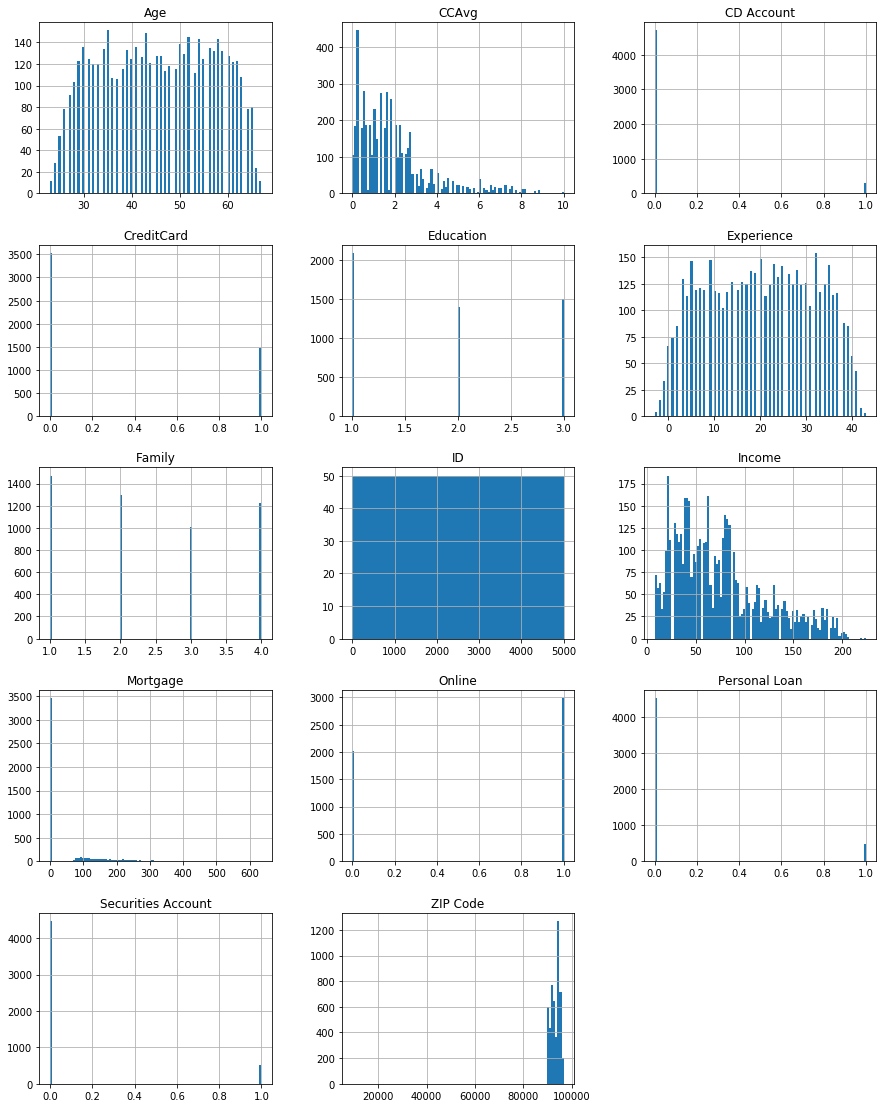

In [13]:
#Univariate Analysis
Bank_Data.hist(stacked=False, bins=100, figsize=(15,40), layout=(10,3));

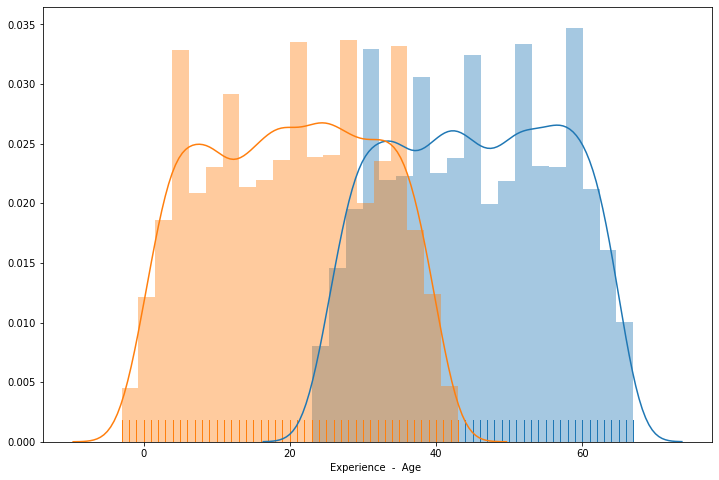

In [59]:
#Normal Distribution plot of Age and Experience
plt.figure(figsize=(12,8))
sns.distplot(Bank_Data.Age, rug=True)
sns.distplot(Bank_Data.Experience, rug=True)
plt.xlabel("Experience  -  Age ")
plt.show()

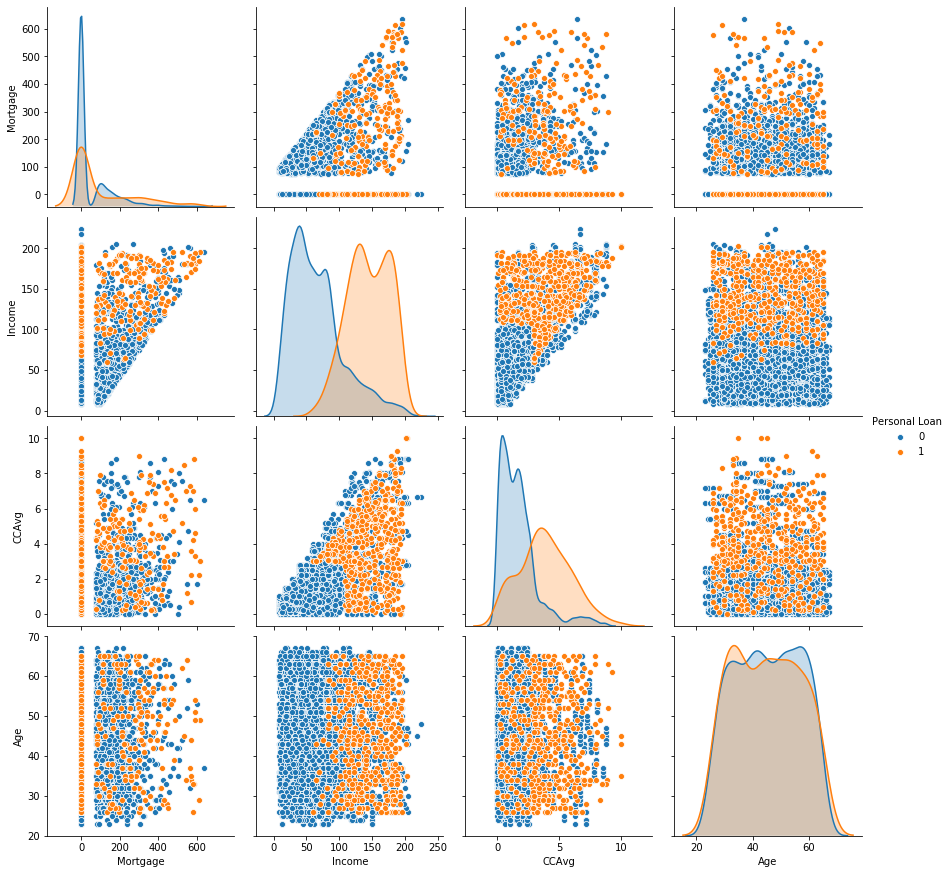

In [66]:
#Normal Distribution plot
#plt.figure(figsize=(40,40))
sns.pairplot(Bank_Data[['Mortgage', 'Income', 'CCAvg', 'Age','Personal Loan']], hue='Personal Loan', diag_kind='kde', 
             height=3, aspect=1)

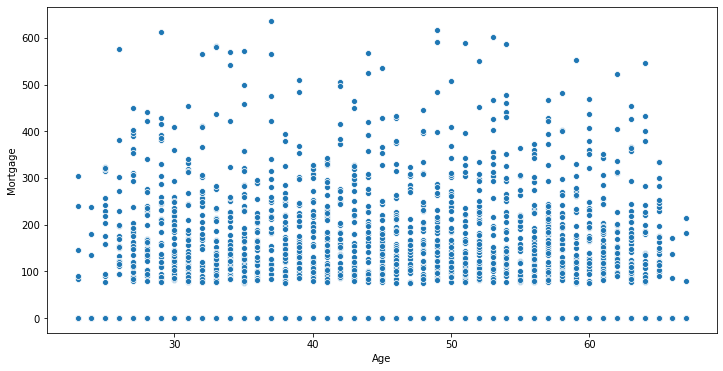

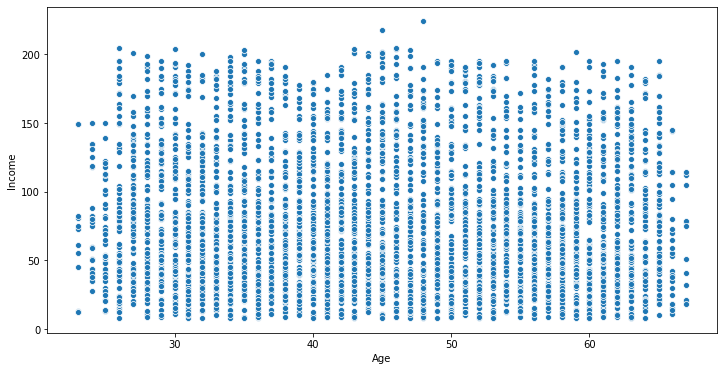

In [15]:
#Bivariate Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="Mortgage", data = Bank_Data) 

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="Income", data = Bank_Data)

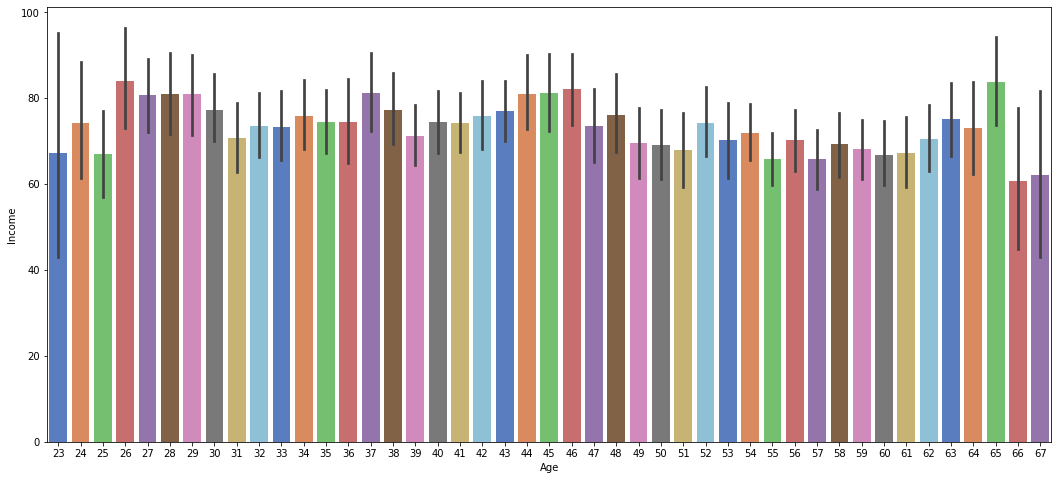

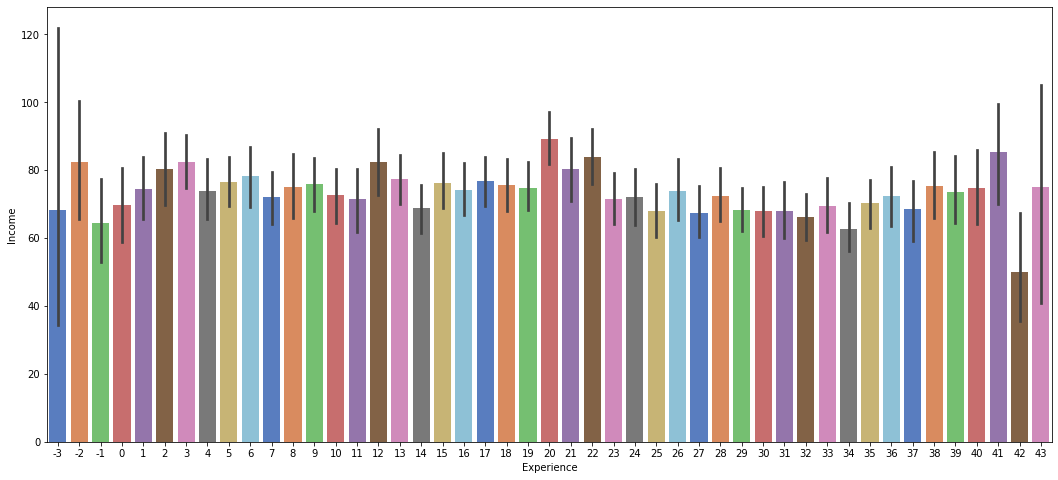

In [68]:
#Bivariate Analysis
plt.figure(figsize=(18,8))  # setting the figure size
ax = sns.barplot(x='Age', y='Income', data=Bank_Data, palette='muted')  # barplot

plt.figure(figsize=(18,8))  # setting the figure size
ax = sns.barplot(x='Experience', y='Income', data=Bank_Data, palette='muted')  # barplot

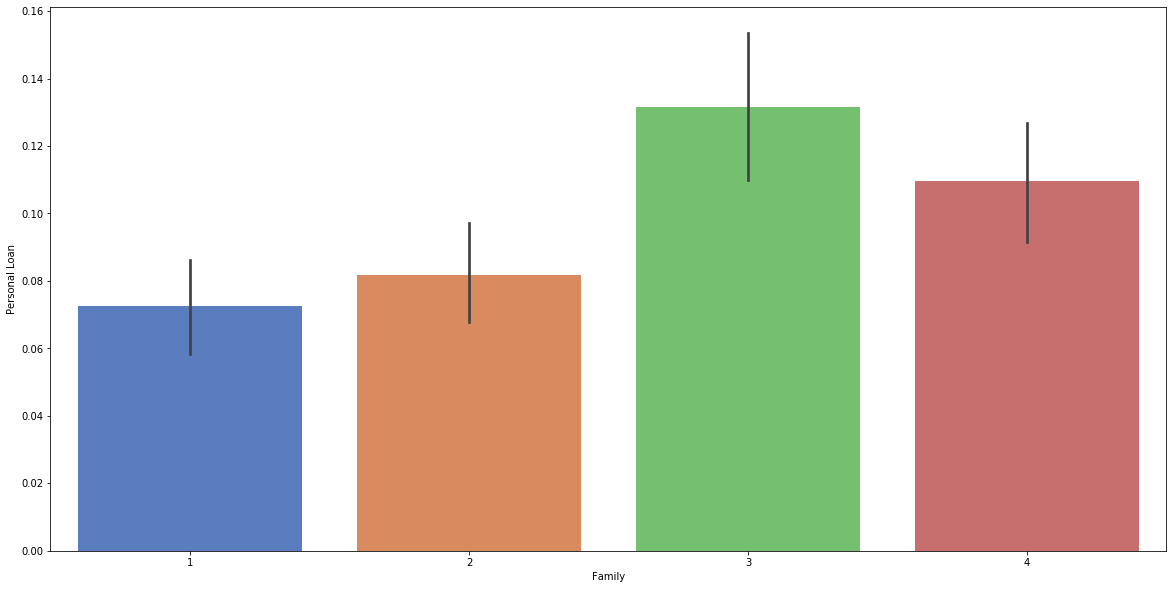

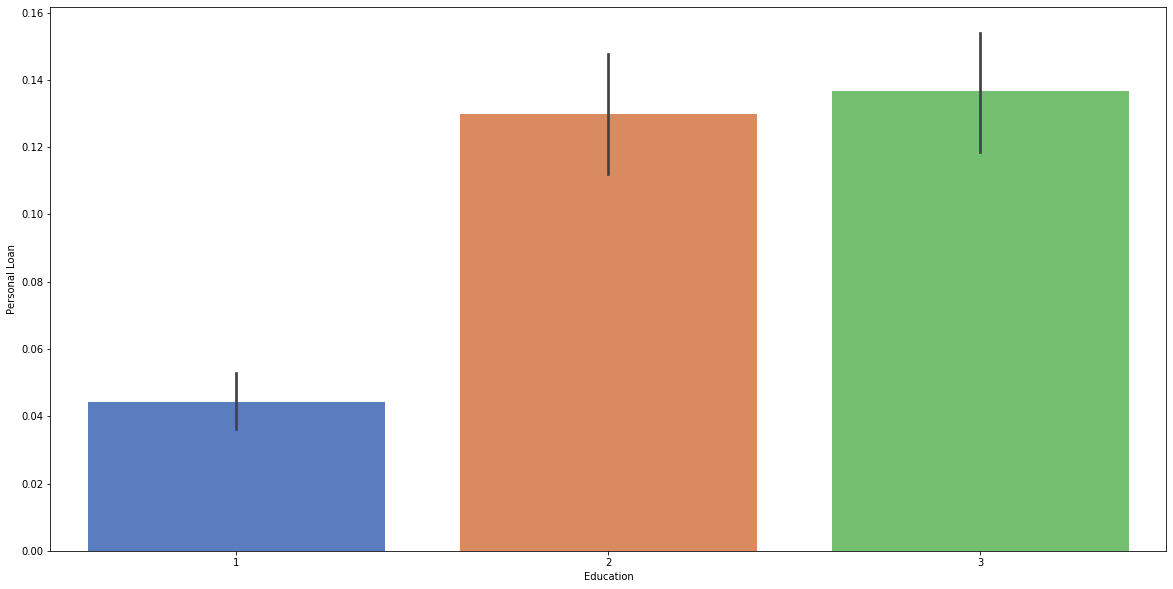

In [64]:
#Bivariate Analysis
plt.figure(figsize=(20,10))  # setting the figure size
ax = sns.barplot(x='Family', y='Personal Loan', data=Bank_Data, palette='muted')  # barplot
plt.figure(figsize=(20,10))  # setting the figure size
ax = sns.barplot(x='Education', y='Personal Loan', data=Bank_Data, palette='muted')  # barplot

Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
Personal Loan          0          1
Family                             
1              92.730978   7.269022
2              91.820988   8.179012
3              86.831683  13.168317
4              89.034370  10.965630 Percentage %


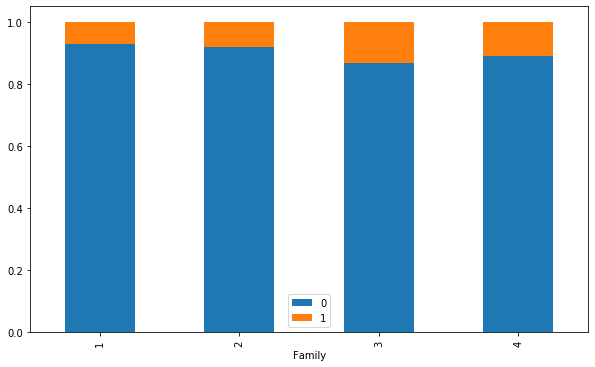

In [95]:
family=pd.crosstab(Bank_Data['Family'],Bank_Data['Personal Loan'])
family.div(family.sum(1).astype(float),axis=0).plot(figsize=(10,6),kind='bar', stacked=True)
plt.legend(loc='down right')
print(family)
print(family.div(family.sum(1).astype(float),axis=0)*100,'Percentage %')

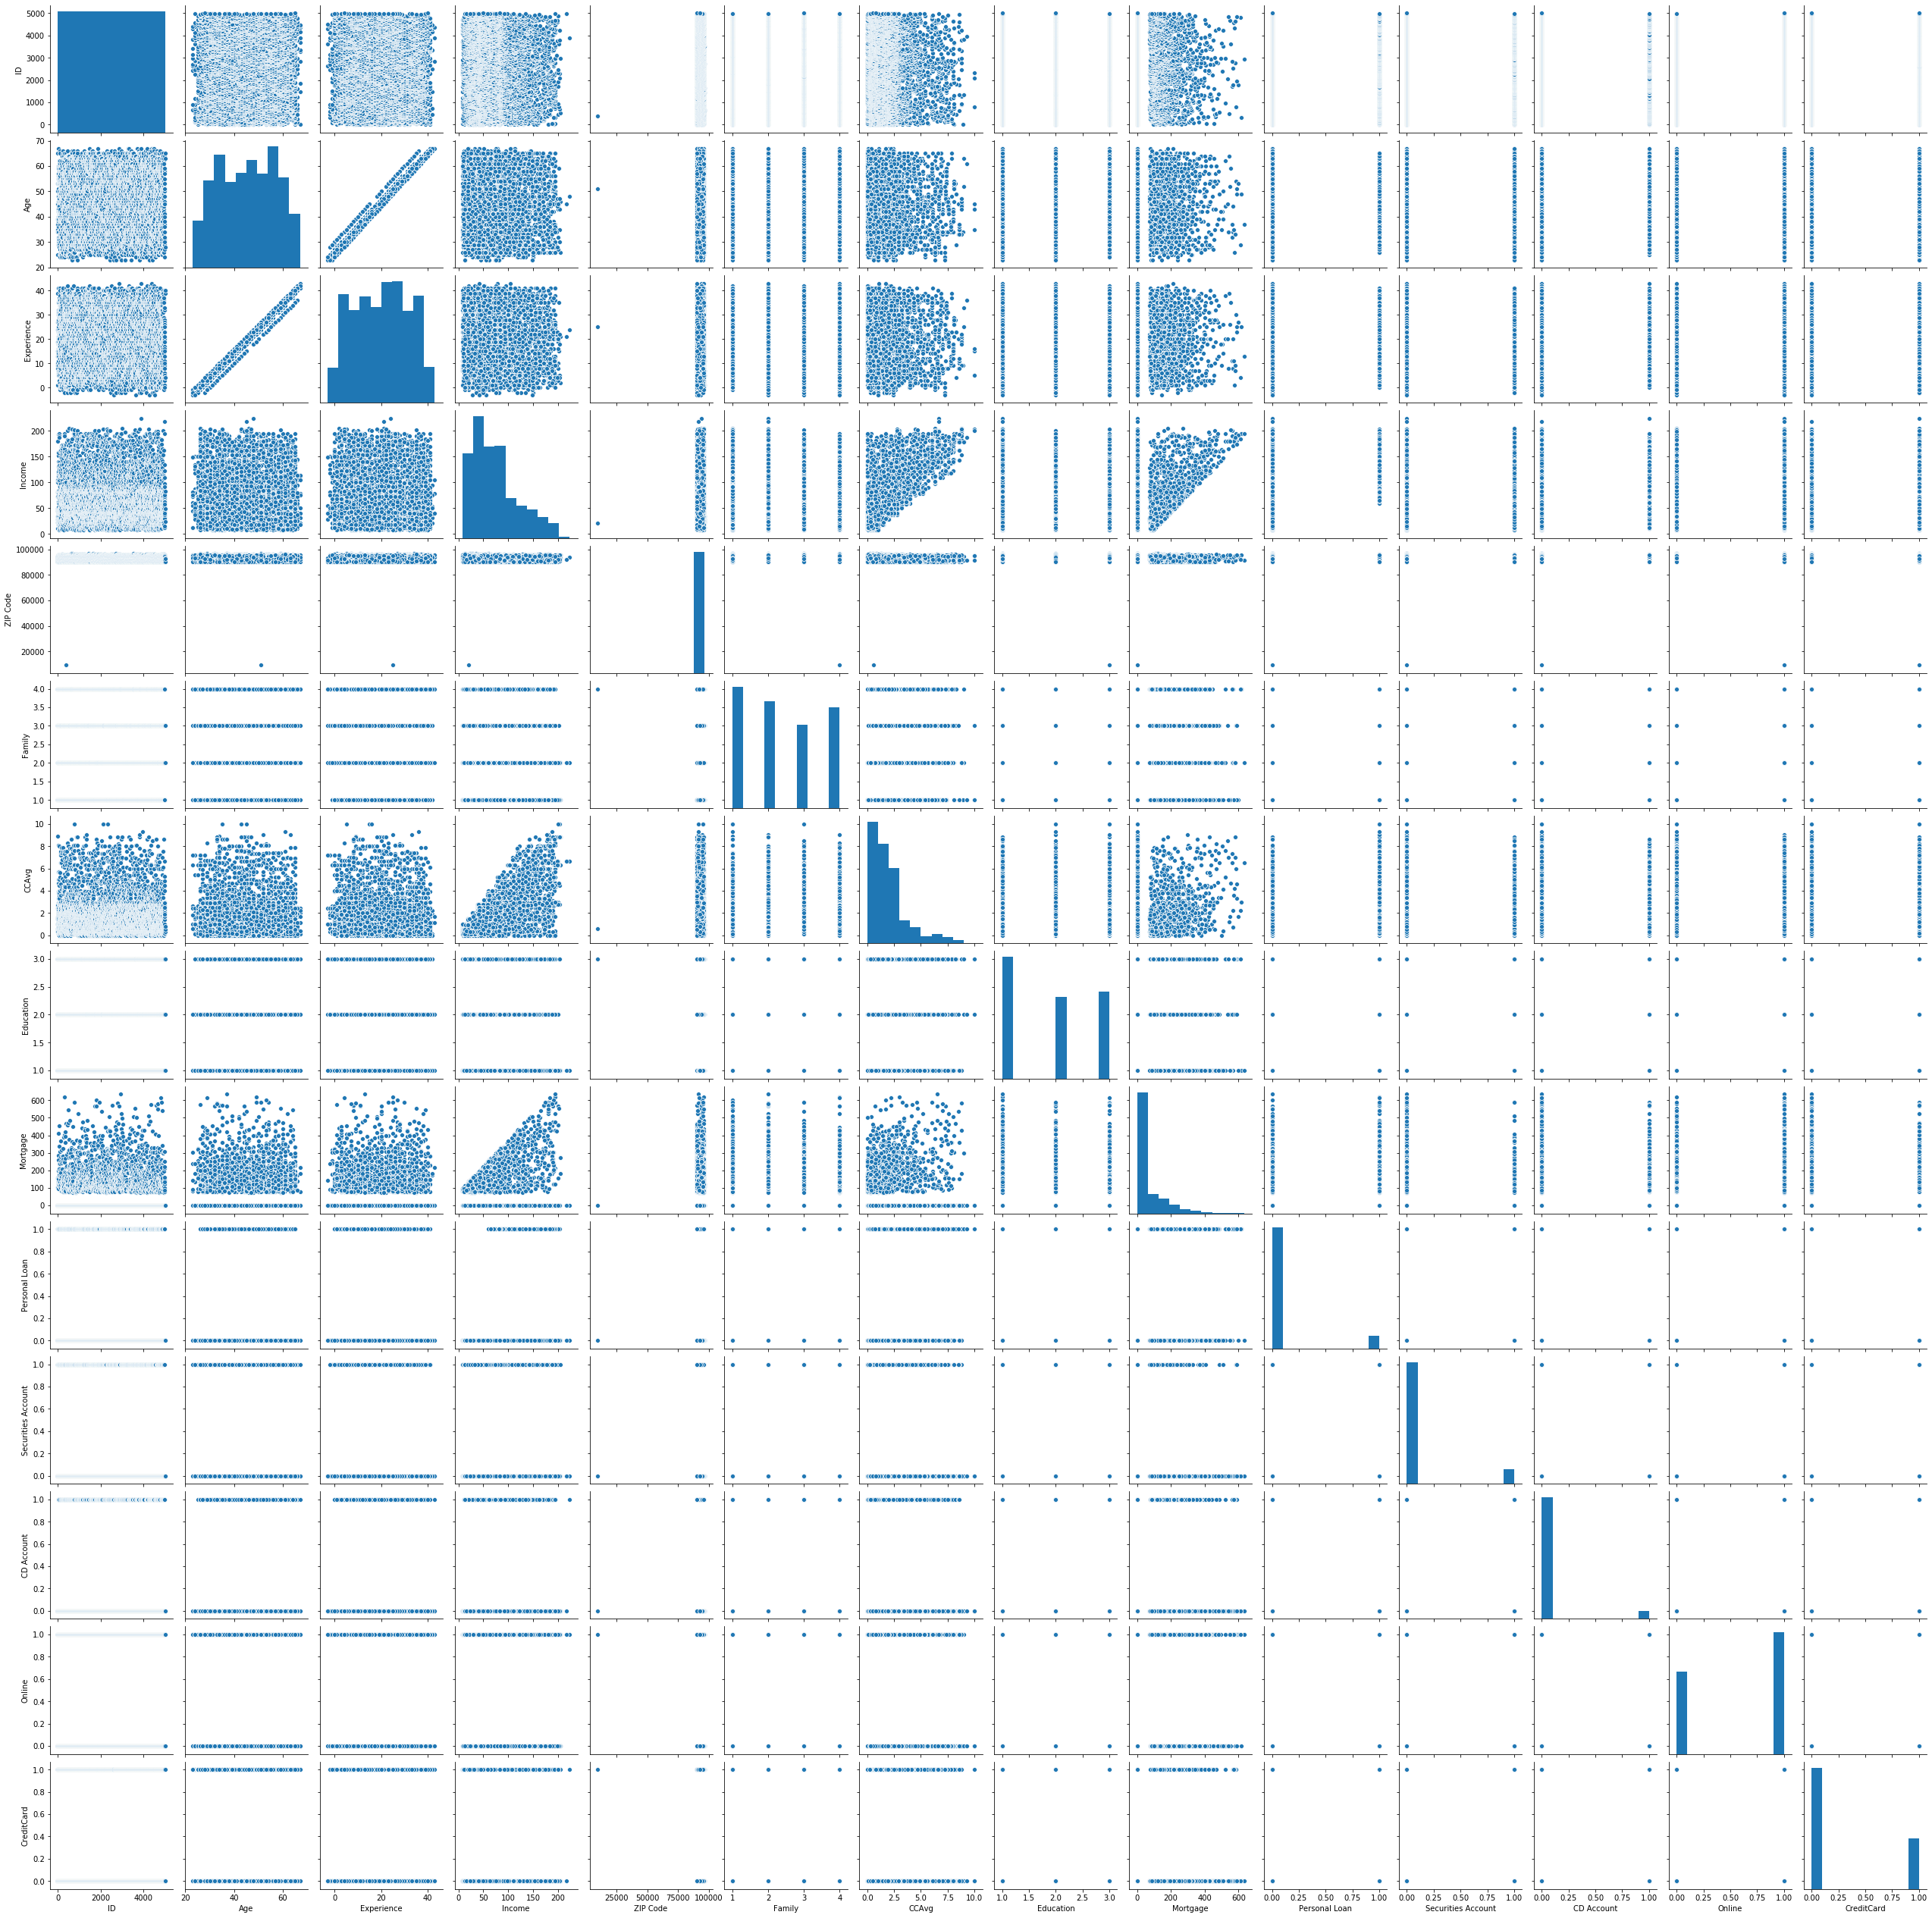

In [17]:
#Bivariate Analysis
sns.pairplot(Bank_Data)
plt.show()

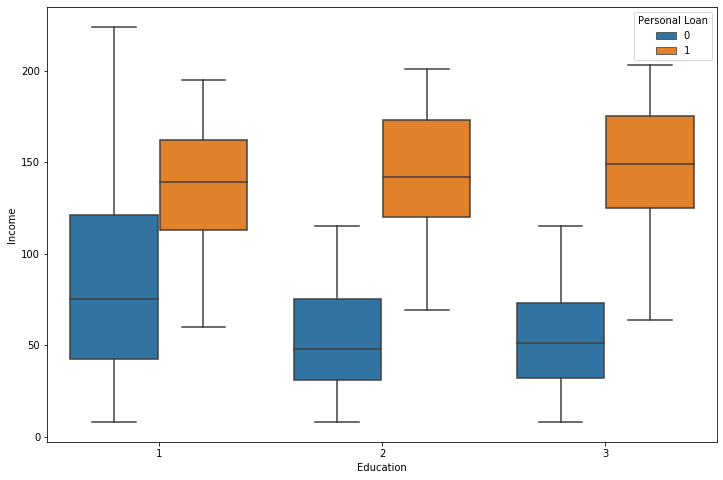

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=Bank_Data)

#### Observations & Findings 1: 
Age and Experience are symmetrical distrbuted. <br>
Income and CCAvg.spending are Positive Skewed <br>
The number of family members may not significantly affect probability, however its seems that the larger families (3 or more members) tend to be more possitive in purchasing a loan.<br>
From the above plots, we can state that customers who are more educated have a higher probability of buying personal loans.<br>
Customers with age between 30–55 form the vast amount that will probably obtain personal loans <br>
Significant Observation 1: "Experience" has Negative Values which must be replacent at Data preparation stage.<br>
Significant Observation 2: "Mortgage" curve is highly positive skewed (Skewness) and there are a lot of outlier’s present (Kurtosis)so an outlier treatment must be applied to the data before modelling.  

## Get data model ready  

In [89]:
# We drop "ID" and "Personal Load" as they do not add any value to our Correlation Analysis
Bank_Data1 = Bank_Data.drop(["ID","Personal Loan"],axis=1)
y = Bank_Data["Personal Loan"]

In [90]:
#Correlation
Bank_Data1.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.019972,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644


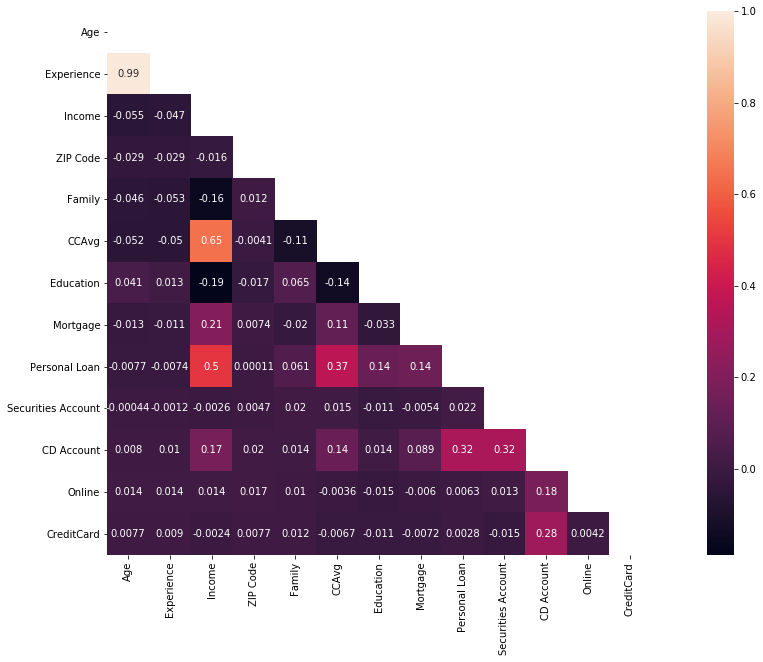

In [93]:
Bank_Data = Bank_Data.drop(["ID"],axis=1)
corr = Bank_Data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
sns.heatmap(corr, mask=mask,annot=True,square=True)


### Observations & Findings 2: 
Correlation between Age and Experience is very high(ρ = 0.99) which is logical and<br> 
Income and Avg. spending on credit cards per month are also highly correlated(ρ=0.65)<br>
Income, CCAvg and CD Accoubt are the features that have good correlation with the target variable "Personal Loan"

In [96]:
# Count the negative values in Experience
Bank_Data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
print(Bank_Data[Bank_Data['Experience'] < 0]['Experience'].count())
#print(Bank_Data[Bank_Data['Age'] < 0]['Age'].count())

52


In [97]:
Bank_Data.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [98]:
#The column 'Experience' has negative values. This need to be replaced with median

Bank_Data = Bank_Data.mask(Bank_Data < 0, np.nan)
medianFiller = lambda x: x.fillna(x.median())
Bank_Data = Bank_Data.apply(medianFiller,axis=0)
Bank_Data.head()
#Bank_Data.median()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [99]:
print('Number of -ve rows in the Employee column Experience:')
Bank_Data[Bank_Data['Experience'] < 0]['Experience'].count()

Number of -ve rows in the Employee column Experience:


0

In [100]:
# Transform the categorical variables Education and Family to numerical
Bank_Data= pd.get_dummies(Bank_Data, columns=['Family', 'Education'])
Bank_Data.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,1,25,1.0,49,91107,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,2,45,19.0,34,90089,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,3,39,15.0,11,94720,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,4,35,9.0,100,94112,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5,35,8.0,45,91330,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [101]:
#Dropping zip code as it is not useful for analysis
Bank_Data = Bank_Data.drop(["ZIP Code", "ID", 'Experience'], axis=1)
#y = Bank_Data["Personal Loan"]
Bank_Data.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,25,49,1.6,0,0,1,0,0,0,0,0,0,1,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,0,1,0,1,0,0
2,39,11,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,35,100,2.7,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [102]:
from scipy import stats
Bank_Data['Mortgage_zscore']=np.abs(stats.zscore(Bank_Data['Mortgage']))
Bank_Data=Bank_Data[Bank_Data['Mortgage_zscore']<3]
Bank_Data.drop('Mortgage_zscore', axis=1, inplace=True)

In [103]:
Bank_Data.shape

(4895, 16)

## Observations and Findings 3.

The outputs clearly leads to  conclude to the below statments :

1) Due to the fact that the atτribute/column 'Experience' has negative values, we procced in replacing those values   by median for that column (Median for Experience = 20).

2) By the examination of the dataset we determined that 'Family' and 'Education' are categorical variables and for this reason these have been converted into dummy variables.

3) There is no need of the'ZIP Code' because as it is not useful for data analysis as it does not have any meaningful information. Hence, this column has been dropped.

4)Having outliers has a significant effect on the mean and standard deviation and, hence affecting the distribution. 
Due to these outliers’ bulk of the data in the Mortgage is at the left and the right tail is longer so we remove outliers from our data sets (skewness)by doing the z-score.

4) By the analysis one can understand right away that there is a very high correlation between the columns 'Age' and 'Experience' (Correlation =0.99).


------------------------------------------------------------------------------------------------------

## 3nd step "Splitting the data"
As we continue our study, in order to proceed in finding the best model, it is needed to split/devide the data into training and test set. <br> 
The data wil be spited in portions of 70:30 respectively.


In [177]:
# the independent variable 
X = Bank_Data.drop(['Personal Loan'], axis=1) 
# the dependent variable 
y = Bank_Data[['Personal Loan']]
 
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_test.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
658,52,35,0.90,0,0,0,0,0,0,0,1,0,0,0,1
3841,30,81,0.20,0,0,0,1,0,0,1,0,0,1,0,0
1036,53,55,0.90,119,0,0,1,1,0,0,0,1,1,0,0
4857,37,115,0.80,0,0,0,1,1,1,0,0,0,0,1,0
624,33,54,1.67,122,0,0,1,0,0,1,0,0,0,1,0


In [178]:
print("The trainning set contains {0:0.1f}% of the data given in the Bank_Data set".format((len(X_train)/len(Bank_Data.index)) * 100))
print("The test set contains {0:0.1f}% of the data given in the Bank_Data set".format((len(X_test)/len(Bank_Data.index)) * 100))

The trainning set contains 70.0% of the data given in the Bank_Data set
The test set contains 30.0% of the data given in the Bank_Data set


## 4th Step "Logistic Regression model"
In the previous steps we managed to eliminate all the negative values in the observations, tranform categorical variables into dummies and understand, that for our analysis variable as Zip Code is not useful so we drop it from our dataset.
It is now high time to proceed into finding the best model with the aid of Logistic Regression so as to be able to predict the potential customers that would buy personal loans.

In [397]:
#import sklearn library the nescessary tools 

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

# Fit the model on train

model = LogisticRegression(solver="liblinear", penalty='l2')#C=5.0
model.fit(X_train, y_train)

#predict on test
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
X_train.head()

          0         1         2        3         4         5         6  \
0 -0.009781  0.055373  0.149563  0.00107 -0.616946  2.865662 -0.590162   

         7         8         9        10        11        12        13  \
0 -0.69982 -1.874995 -1.992399 -0.348549 -0.687145 -3.944084 -0.526882   

         14  intercept  
0 -0.432122  -4.903088  


,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
3402,64,95,0.0,0,0,0,1,1,0,1,0,0,0,0,1
4688,29,69,1.8,0,0,0,1,1,0,0,0,1,0,1,0
4505,40,90,1.1,0,1,0,1,0,0,0,0,1,0,1,0
2238,48,35,1.4,0,0,0,1,0,1,0,0,0,0,0,1
3,35,100,2.7,0,0,0,0,0,1,0,0,0,0,1,0


In [398]:
# define the score that the suggested model has on the test set
model_score = model.score(X_test, y_test)
print('The model Accuracy score is:',model_score)

The model Accuracy score is: 0.9639210347174949


In [399]:
#import from sklearn the nescessary functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

print(" Metrics to Evaluate the Model ")
print()
a_f1_score = f1_score(y_test,y_predict)
print("1.F1 Score:",a_f1_score)
print()
b_accuracy=accuracy_score(y_test,y_predict)
print("2.Accuracy:", b_accuracy)
print()
auc0 = roc_auc_score(y_test,y_predict)
print('3.AUC : %.4f' % auc0)
#fpr,tpr,_= metrics.roc_curve(y_test,y_predict)
#c_auc= metrics.auc(fpr,tpr)
#print("3.AUC", c_auc)
LogReg_prob=model.predict_proba(X_test)
fpr,tpr,theshold=roc_curve(y_test,LogReg_prob [:,1])
roc_auc1=auc(fpr,tpr)
print( "4.AUC Prob: %f" % roc_auc1)
print()
d_precision = metrics.precision_score(y_test, y_predict)
print("4.Precision:", d_precision)
print()
e_recall = metrics.recall_score(y_test, y_predict)
print("5.Recall:", e_recall)
print()
f_gini_Coeff = 2*roc_auc1 - 1
print("6.Gini Coefficient:", f_gini_Coeff)
print()
print('8.The Kappa Score is:',cohen_kappa_score(y_test, y_predict))
print()
print('9.Clasification Report')
print(classification_report(y_test,y_predict))


 Metrics to Evaluate the Model 

1.F1 Score: 0.7579908675799087

2.Accuracy: 0.9639210347174949

3.AUC : 0.8212
4.AUC Prob: 0.954348

4.Precision: 0.9120879120879121

5.Recall: 0.6484375

6.Gini Coefficient: 0.9086968680089484

8.The Kappa Score is: 0.7390982356785014

9.Clasification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.91      0.65      0.76       128

    accuracy                           0.96      1469
   macro avg       0.94      0.82      0.87      1469
weighted avg       0.96      0.96      0.96      1469



(2.0, 0.0)

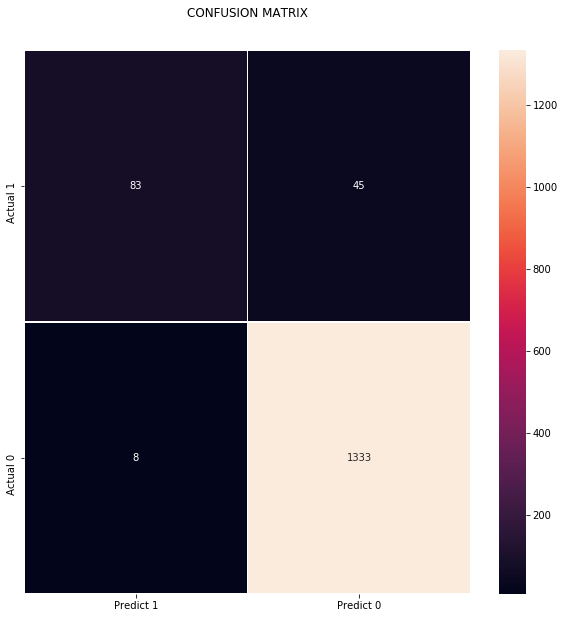

In [400]:
# creating the confusion matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (10,10))
plt.title('CONFUSION MATRIX', y=1.05)
ax = sns.heatmap(df_cm, annot=True,linewidths=0.5, fmt='g')

bottom, top = ax.get_ylim() # Ensure data is within the borders of the heatmap
ax.set_ylim(bottom + 0.0, top - 0.0)

### The Confusion Matrix
__________________________________________________________________________________________________________

1.True Positives (TP):
We correctly predicted that 83 persons will take loan and that was confirmed from the actual observations.

2.True Negatives (TN): 
We correctly predicted that 1333 persons will NOT take loan and that was confirmed from the actual observations.

3.False Positives (FP): 
We incorrectly predicted that 8 persons will take a peronal loan BUT they did not(a "Type I error"). 

Falsely predict positive Type I error

4.False Negatives (FN): 
We incorrectly predicted that 45 persons will NOT take a personal loan BUT they did(a "Type II error".  

Falsely predict negative Type II error

In [439]:
#Print all the metrics related for evaluating the model performance
output=pd.DataFrame({'Model':['Logistic Regression'],
                    'F1_Score':a_f1_score,
                    'Accuracy':b_accuracy,
                    'AUC':roc_auc1,
                   'Precision':d_precision,
                   'Recall':e_recall,
                   'Gini Co-Eff':f_gini_Coeff}).round(decimals=2)
print()
print('The table below presents some significant metrics of the Model:')
print()
output



The table below presents some significant metrics of the Model:



,Model,F1_Score,Accuracy,AUC,Precision,Recall,Gini Co-Eff
0,Logistic Regression,0.76,0.96,0.95,0.91,0.65,0.91


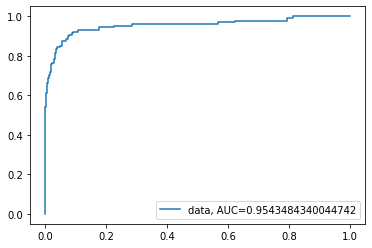

In [402]:
#ROC Curve
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train,y_train)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### Observation & Finding 4:
From the above graphic, we can see that for this case the Area Under Curve (AUC) is aproximately 0.95.
In general, when AUC score is 1, a perfect classifier is represented, and when 0.5 a worthless classifier is represented. 

5th Step Reasoning on how can the model perform better
_____________________________________________________________________________________

In order to make our Regression Model perfor better we try to fine tune it by
1. Testing different solving Algorithms, called(solvers) such as‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’. 
2. Moreover we will try to  change the C value of the log reg model, (Cfloat, default=1.0)
This is Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. I experiment with different values (from 0.5-100) and 
3. other parameters used to specify the norm used in the penalization or stronger regularization
 More specifically penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.


In [407]:
#1) change some hyperparamteres like solver:’ liblinear’ or solver: ‘saga’ 
#2) change the C value when you instantiate the log reg model and experiment with different values

# Changing solver to newton-cg and changing C value is giving a better model with better values for performance metrics
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="newton-cg", penalty='l2', C=10.5)
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


          0         1         2         3         4         5         6  \
0  0.007036  0.065007  0.185928  0.001502 -0.809295  3.449747 -0.628688   

          7         8         9        10        11        12        13  \
0 -0.849729 -0.786973 -0.938948  1.034167  0.691754 -2.768148  1.333439   

         14  intercept  
0  1.434709  -9.827924  


In [408]:

model_score = model.score(X_test, y_test)
print('The model score is:',model_score)

The model score is: 0.9659632402995235


In [438]:

from sklearn.metrics import accuracy_score,f1_score,roc_curve,auc
a1_f1_score = f1_score(y_test,y_predict)
print("1.F1 Score:",a_f1_score)
print()
b1_accuracy=accuracy_score(y_test,y_predict)
print("2.Accuracy:", b1_accuracy)
print()
fpr,tpr,_= metrics.roc_curve(y_test,y_predict)
c1_auc= metrics.auc(fpr,tpr)
#print("3.AUC", c1_auc)
LogReg_prob=model.predict_proba(X_test)
fpr,tpr,theshold=roc_curve(y_test,LogReg_prob[:,1])
roc_auc2=auc(fpr,tpr)
print( "3.ROC-AUC: %0.4f" % roc_auc2)
print()
d1_precision = metrics.precision_score(y_test, y_predict)
print("5.Precision:", d1_precision)
print()
e1_recall = metrics.recall_score(y_test, y_predict)
print("6.Recall:", e1_recall)
print()
f1_gini_Coeff = 2*roc_auc2 - 1
print("7.Gini Coefficient:", f1_gini_Coeff)
print()
print('8.The Kappa Score is:',cohen_kappa_score(y_test, y_predict))
print()
print('9.Clasification Report')
print(classification_report(y_test,y_predict))


1.F1 Score: 0.7579908675799087

2.Accuracy: 0.9659632402995235

3.ROC-AUC: 0.9532

5.Precision: 0.90625

6.Recall: 0.6796875

7.Gini Coefficient: 0.906459731543624

8.The Kappa Score is: 0.7587690488702049

9.Clasification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1341
           1       0.91      0.68      0.78       128

    accuracy                           0.97      1469
   macro avg       0.94      0.84      0.88      1469
weighted avg       0.96      0.97      0.96      1469



(2.0, 0.0)

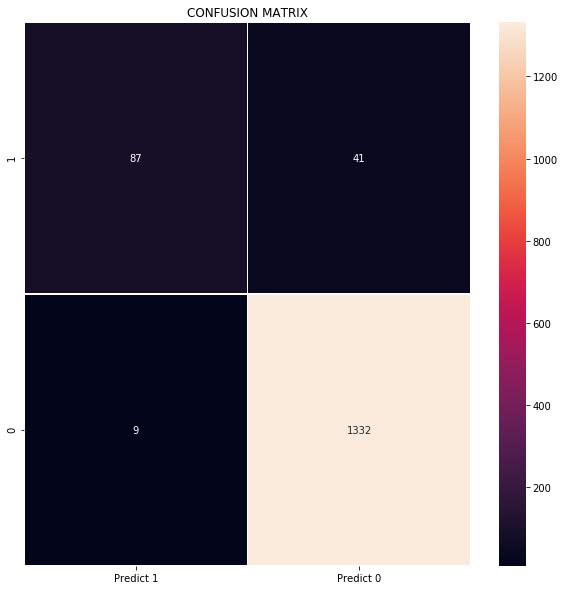

In [411]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,10))
plt.title('CONFUSION MATRIX', y=1.0)
ax = sns.heatmap(df_cm, annot=True,linewidths=0.5, fmt='g')

bottom, top = ax.get_ylim() # Ensure data is within the borders of the heatmap
ax.set_ylim(bottom + 0.0, top - 0.0)

### The Confusion Matrix
__________________________________________________________________________________________________________

1.True Positives (TP):
We correctly predicted that 87 persons will take loan and that was confirmed from the actual observations.

2.True Negatives (TN): 
We correctly predicted that 1332 persons will NOT take loan and that was confirmed from the actual observations.

3.False Positives (FP): 
We incorrectly predicted that 9 persons will take a personal loan BUT they did not(a "Type I error"). 

4.False Negatives (FN): 
We incorrectly predicted that 41 persons will NOT take a personal loan BUT they did(a "Type II error".  

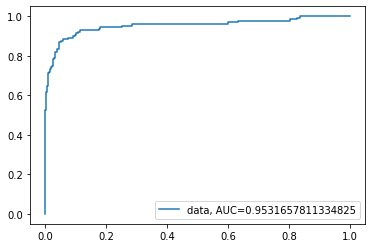

In [436]:
#ROC Curve
logreg = LogisticRegression(solver="newton-cg")
logreg.fit(X_train,y_train)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

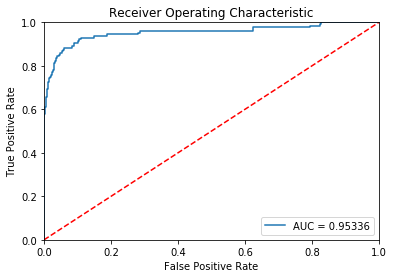

In [373]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Comparison of the two Linear Regression Models

In [434]:
#Print all the metrics related for evaluating the model performance
improved_output=pd.DataFrame({'Model':['Original Model','After PARAMETER Change'],
                    'F1_Score':[a_f1_score,a1_f1_score],
                    'Accuracy':[b_accuracy,b1_accuracy],
                    'AUC':[roc_auc1,roc_auc2],
                   'Precision':[d_precision,d1_precision],
                   'Recall':[e_recall,e1_recall],
                   'Gini Co-Eff':[f_gini_Coeff,f1_gini_Coeff]}).round(decimals=2)
improved_output.round(decimals=2)
print('Comparison Table:')
print('Improvment of the Metrics - Comparison between the Original Model and the one after the change or parameter')
print()
improved_output

Comparison Table:
Improvment of the Metrics - Comparison between the Original Model and the one after the change or parameter



,Model,F1_Score,Accuracy,AUC,Precision,Recall,Gini Co-Eff
0,Original Model,0.76,0.96,0.95,0.91,0.65,0.91
1,After PARAMETER Change,0.78,0.97,0.95,0.91,0.68,0.91



### Observations and Findings 5:

There were small iproovements after experimenting wirh the algorythms and parameters but this is mainly to previous good data preparation and Linear Regressions Model's limitations.
Aa further attempt was made  to check the hypothesis that other models can have better scores, but as this is out of the scope of the current case study are included in the Appendix A.

The co-efficient of 'CD Account' has the highest absolute value. So, 'CD Account' is impacting the most
So, those holding a 'CD Account' will have a high probability to go for the 'Personal Loan', while those not having the 'CD Account' will have a lower probability

The co-efficient of 'ID' has the least absolute value (close to 0). So, 'ID' is impacting the least

Performance metrics have improved after dropping columns that have very low absolute values of co-efficient



## Business understanding of the model
Personal loans are considerd as a revenue generating mechanism for Thera bank and reach out to potential customers to campaign for loan offerings.
In this case study we test the power of machine learning to target the campaigns towards the right set of customers, thereby increasing conversion propensity using past data available on the demography, bank details, and transaction patterns of customers who have responded and not responded to a personal loan campaign, as training data to predict the probability if a customer will respond to the campaign.<br>

In order to build the appropriate model relating the independent predictors (x variable) with the response variable (y), that is to predict the number of a customers buying personal loans, a Logistic Regression model was developed.
The probabilities from the model will be used to classify the outcome and identify variables that influence the response. The goal is to build a model that identifies customers who are most likely to accept the loan offer in future personal loan campaigns.

To succed the task we use the following methodology:

Problem Definition

Dataset Analytical Study and Describe  

Exploratory Data Analysis: This helped provide initial insights on the distribution of the variables as well as important features impacting the response variable.

Data Clean-up and Preparation for the Machine Learning Model
Split dataset into development (train) and holdout (validation or test) Datasets

Build the Logistic Regression based Prediction Model
Run the model and Validate it thoroughly calculating its accuracy, precision, recall and other scoring factors but more significally we develop an run the confusion matrix of the model. 
The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

Finally in order to make our Regression Model perfor better we try to fine tune it by testing different solving Algorithms, called(solvers) with names such as‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ and change also other parameters used to specify the norm used in the penalization or stronger regularization.
Concluding, Logistic Regression technique not only to predict the class of customers responding to the loan campaign but also get a list of statistically significant independent variables that influence the customer response to the campaign. Additionally we are also able to predict the probability of a customer responding or not responding based on the model summary.

Observations & Findings 1-5 can be also used by the Bank to target (or not) specific customers and improve the responce rate to the loan campaigns.


## Appendix A Further tests with other Models

In [307]:
import sys
!{sys.executable} -m pip install xgboost

In [308]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=101)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [311]:
predict = xgb.predict(X_test)
predictProb = xgb.predict_proba(X_test)

score1 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="roc_auc")

print("confusion_matrix :\n",confusion_matrix(y_test, predict))
print("\nclassification_report :\n",classification_report(y_test, predict))
print('Recall Score',recall_score(y_test, predict))
print('ROC AUC :', roc_auc_score(y_test, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_test, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_test, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())

confusion_matrix :
 [[1331   10]
 [  16  112]]

classification_report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1341
           1       0.92      0.88      0.90       128

    accuracy                           0.98      1469
   macro avg       0.95      0.93      0.94      1469
weighted avg       0.98      0.98      0.98      1469

Recall Score 0.875
ROC AUC : 0.9931545954511558
Accuracy : 0.9823008849557522
Matthews Corr_coef : 0.8866385492522452

Cross Validation Recall : 0.8885245901639344
Cross Validation Roc Auc : 0.9974418915510718


In [309]:
rfc = RandomForestClassifier(n_estimators=101,max_depth=250,max_leaf_nodes=50,random_state=101)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=250, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [310]:
predict = rfc.predict(X_train.values)
predictProb = rfc.predict_proba(X_train.values)

score1 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="recall")
score2 =cross_val_score(X=X_train,y=y_train,estimator=xgb,scoring="roc_auc")

print("confusion_matrix :\n",confusion_matrix(y_train, predict))
print("\nclassification_report :\n",classification_report(y_train, predict))
print('Recall Score',recall_score(y_train, predict))
print('ROC AUC :', roc_auc_score(y_train, predictProb[:,1]))
print('Accuracy :',accuracy_score(y_train, predict))
print('Matthews Corr_coef :',matthews_corrcoef(y_train, predict))
print("\nCross Validation Recall :",score1.mean())
print("Cross Validation Roc Auc :",score2.mean())

confusion_matrix :
 [[3121    0]
 [  26  279]]

classification_report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3121
           1       1.00      0.91      0.96       305

    accuracy                           0.99      3426
   macro avg       1.00      0.96      0.98      3426
weighted avg       0.99      0.99      0.99      3426

Recall Score 0.9147540983606557
ROC AUC : 0.9999464232250067
Accuracy : 0.99241097489784
Matthews Corr_coef : 0.9524686605904308

Cross Validation Recall : 0.8885245901639344
Cross Validation Roc Auc : 0.9974418915510718


-------------------------------------------------------------------